# Classical ML Training and Results V2 

## INITIALIZATION

In [2]:
from sklearn import svm
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle 
import statistics as stats
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

## MODEL INITIALIZATION

In [3]:
# read data from csv file and put into one matrix 
# same process of v1
def readData(filename,x1):
    f = open("data/"+filename,'r')
    for row in f:
        data = [int(p) for p in row.split(',')]
        x1.append(np.array(data))
    return 

x = []
readData("getOutBed.csv",x)
readData("getOnBed.csv",x)
readData("layOnBed.csv",x)
readData("sitOnBed.csv",x)

In [4]:
# make X an numpy array and initialize Y 
x = np.array(x)
y = np.array([1]*120+[0]*120)

## FEATURE EXTRACTION

In [5]:
x_feature = []
for r in x:
    s1, s2, s3 = r[:20000], r[20000:40000], r[40000:]
    temp1 = [stats.mean(s1), stats.median(s1), stats.variance(s1), max(s1), min(s1)]
    temp2 = [stats.mean(s2), stats.median(s2), stats.variance(s2), max(s2), min(s2)]
    temp3 = [stats.mean(s3), stats.median(s3), stats.variance(s3), max(s3), min(s3)]
#     print temp1
    x_feature.append(np.array(temp1+temp2+temp3))


In [6]:
x_feature = np.array(x_feature)

## BALANCING SAMPLES

In [7]:
index = 120+np.random.choice(360,240,replace=False)

In [8]:
x_lst = x_feature.tolist()
print len(x_lst[0])
for i in sorted(index, reverse=True):
    del x_lst[i]

15


In [9]:
x_feature = np.array(x_lst)

In [10]:
print x_feature.shape

(240, 15)


In [12]:
# shuffle X and Y correspondingly 
X, Y = shuffle(x_feature, y, random_state = 34)
offset = int(len(X)*0.8)
X_train, Y_train = X[:offset], Y[:offset]
X_test, Y_test = X[offset:], Y[offset:]
print (type(X_train), type(Y_train))
print (len(X_train), len(X_train[0]), len(Y_train), len(X_test), len(X_test[0]), len(Y_test))

(<type 'numpy.ndarray'>, <type 'numpy.ndarray'>)
(192, 15, 192, 48, 15, 48)


## LINEAR REGRESSION

In [14]:
reg = LinearRegression().fit(X_train, Y_train)


In [15]:
reg.score(X_test, Y_test)

0.5047366995199458

## SVM 

In [11]:
# training of SVM 
clf = svm.SVC(gamma='scale',max_iter=5000, verbose=True)
clf.fit(X_train, Y_train) 

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=5000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [12]:
# Verification of SVM 
results = clf.predict(X_test)
correct = 0
for i in xrange(len(results)):
    if results[i] == Y_test[i]:
        correct+=1
print (correct/float(len(Y_test)))

0.75


## GAUSSIAN NAIVE BAYES

In [13]:
# training 
clf_nb = GaussianNB()
clf_nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
results_nb = clf_nb.predict(X_test)
print results

[1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1
 1 0 1 0 1 1 0 1 0 0 0]


In [15]:
# verification
c_nb = 0 
for i in xrange(len(results_nb)):
    if results_nb[i] == Y_test[i]:
        c_nb += 1
print (c_nb/float(len(Y_test)))

0.833333333333


## GRADIENT BOOSTING CLASSIFIER

In [55]:
clf_gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0,max_depth=3, random_state=0, verbose = True).fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1           0.5330            0.65s
         2           0.3273            0.59s
         3           0.2288            0.55s
         4           0.1385            0.51s
         5           0.1053            0.50s
         6           0.0730            0.50s
         7           0.0515            0.49s
         8           0.0457            0.47s
         9           0.0374            0.47s
        10           0.0307            0.47s
        20           0.0055            0.38s
        30           0.0008            0.34s
        40           0.0003            0.30s
        50           0.0003            0.26s
        60           0.0003            0.23s
        70           0.0003            0.21s
        80           0.0003            0.19s
        90           0.0003            0.18s
       100           0.0003            0.17s
       200           0.0003            0.09s
       300           0.0003            0.05s
       40

In [56]:
# verification
clf_gbc.score(X_test,Y_test)

0.8541666666666666

### Cross Validation -- Tune Max Depth for GBC

In [57]:
scores = []
std_scores = []
for i in range(1,10):
    clf_gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0,max_depth=i, random_state=0, verbose = False)
    cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
    this_score = cross_val_score(clf_gbc, X, Y,cv=cv, verbose=0)
    scores.append(np.mean(this_score))
    std_scores.append(np.std(this_score))
print(scores, std_scores)

([0.8770833333333334, 0.875, 0.8729166666666666, 0.8791666666666668, 0.8458333333333334, 0.8416666666666666, 0.8416666666666666, 0.8416666666666666, 0.8416666666666666], [0.02411632688081298, 0.013176156917368235, 0.015309310892394868, 0.022438186696393768, 0.025, 0.034485302827597604, 0.0318688719599549, 0.0318688719599549, 0.0318688719599549])


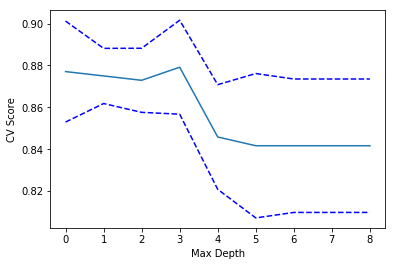

In [58]:
plt.plot(np.array(scores),)
plt.plot(np.array(scores)+np.array(std_scores),'b--')
plt.plot(np.array(scores)-np.array(std_scores),'b--')
plt.xlabel("Max Depth")
plt.ylabel("CV Score")
plt.show()